# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API Docs ask for unit specification. Specifying imperial.
units = "imperial"

# API Request URL - open '&q=' at end of URL for adding city name at end of URL for future looping
req_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


# Declare Variables
city_name = []
city_lat = []
city_lng = []
city_temp = []
city_max_temp = []
city_humidity = []
city_cloudy = []
city_winds = []
city_country = []
city_date = []
request = 1
query_set = 1

# print initial header before displaying for loop  data
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # Attach city array contents to req_url
    query_url = req_url + city
    
    # Store requested data in local json variable to limit API calls
    data = requests.get(query_url).json()
    
    # Gather and store data in arrays
    try:
        print(f"Processing Record {request} of Set {query_set} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lat.append(data["coord"]["lat"])
        city_lng.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_max_temp.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudy.append(data["clouds"]["all"])
        city_winds.append(data["wind"]["speed"])
        city_date.append(data["dt"])
        
        # Add one for every 'try'
        request += 1
        
        # If statement to split API call into 'sets'
        if request > 50:
            
            # Prepare for next API call, split into 'sets' of calls.
            query_set += 1
            
            # Reset variables for next iteration
            request = 1
            
            # Sleep to add delay limitation for API calls
            request.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# Print showing data is done being gathered
print("!---------------------------!")
print("Data Retrieval Complete")
print("!--------------------------!")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | tucumcari
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | katobu
Processing Record 7 of Set 1 | taolanaro
City 'taolanaro' not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | roma
Processing Record 12 of Set 1 | nelson bay
Processing Record 13 of Set 1 | karaton
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | novikovo
Processing Record 20 of Set 1 | amderma
City 'amderma' not found. Skipping...
Processing Record 20 of S

Processing Record 5 of Set 4 | sept-iles
Processing Record 6 of Set 4 | sydney
Processing Record 7 of Set 4 | hofn
Processing Record 8 of Set 4 | farafangana
Processing Record 9 of Set 4 | baran
Processing Record 10 of Set 4 | asheboro
Processing Record 11 of Set 4 | gopalpur
Processing Record 12 of Set 4 | lavrentiya
Processing Record 13 of Set 4 | santa isabel do rio negro
Processing Record 14 of Set 4 | qasigiannguit
Processing Record 15 of Set 4 | komsomolskiy
Processing Record 16 of Set 4 | wanaka
Processing Record 17 of Set 4 | jamestown
Processing Record 18 of Set 4 | ampanihy
Processing Record 19 of Set 4 | port elizabeth
Processing Record 20 of Set 4 | braunau
Processing Record 21 of Set 4 | isangel
Processing Record 22 of Set 4 | byron bay
Processing Record 23 of Set 4 | dingle
Processing Record 24 of Set 4 | anahuac
Processing Record 25 of Set 4 | iqaluit
Processing Record 26 of Set 4 | allanridge
Processing Record 27 of Set 4 | beira
Processing Record 28 of Set 4 | ambanja


Processing Record 35 of Set 7 | turayf
Processing Record 36 of Set 7 | passagem franca
Processing Record 37 of Set 7 | bairiki
Processing Record 38 of Set 7 | dover
Processing Record 39 of Set 7 | dikson
Processing Record 40 of Set 7 | trairi
Processing Record 41 of Set 7 | torbay
Processing Record 42 of Set 7 | hearst
Processing Record 43 of Set 7 | rio gallegos
Processing Record 44 of Set 7 | roald
Processing Record 45 of Set 7 | black river
Processing Record 46 of Set 7 | ubinskoye
Processing Record 47 of Set 7 | vostok
Processing Record 48 of Set 7 | takapau
Processing Record 49 of Set 7 | fallon
Processing Record 50 of Set 7 | atherton
City 'atherton' not found. Skipping...
Processing Record 1 of Set 8 | ciudad bolivar
Processing Record 2 of Set 8 | gwadar
Processing Record 3 of Set 8 | bolshiye uki
City 'bolshiye uki' not found. Skipping...
Processing Record 3 of Set 8 | toamasina
Processing Record 4 of Set 8 | delijan
Processing Record 5 of Set 8 | damietta
Processing Record 6 o

Processing Record 9 of Set 11 | poum
Processing Record 10 of Set 11 | maceio
Processing Record 11 of Set 11 | san lawrenz
Processing Record 12 of Set 11 | temaraia
City 'temaraia' not found. Skipping...
Processing Record 12 of Set 11 | gualeguaychu
Processing Record 13 of Set 11 | mortka
Processing Record 14 of Set 11 | maltahohe
Processing Record 15 of Set 11 | mahibadhoo
Processing Record 16 of Set 11 | artyk
City 'artyk' not found. Skipping...
Processing Record 16 of Set 11 | pangkalanbuun
Processing Record 17 of Set 11 | santa rosalia
Processing Record 18 of Set 11 | zarubino
Processing Record 19 of Set 11 | pahrump
Processing Record 20 of Set 11 | zdzieszowice
Processing Record 21 of Set 11 | denpasar
Processing Record 22 of Set 11 | itarema
Processing Record 23 of Set 11 | guasdualito
Processing Record 24 of Set 11 | saint-joseph
Processing Record 25 of Set 11 | savalou
Processing Record 26 of Set 11 | marystown
Processing Record 27 of Set 11 | moron
Processing Record 28 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Dataframe for retrieved data
city_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": city_date,
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp (F)": city_max_temp,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudy,
                                "Wind Speed (mph)": city_winds,
                                })

# Convert unix numbers in date column to readable datetime
city_df["Date"] = pd.to_datetime(city_df["Date"], unit = "s")

# Export retrieved data 
city_df.to_csv("cities.csv", index=True, index_label="City ID", header=True)

city_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tucumcari,US,2021-09-16 08:05:43,35.1717,-103.7250,71.44,60,1,3.44
1,Cape Town,ZA,2021-09-16 08:05:17,-33.9258,18.4232,63.10,72,15,3.00
2,Mataura,NZ,2021-09-16 08:05:43,-46.1927,168.8643,41.49,89,52,2.84
3,Bluff,NZ,2021-09-16 08:05:44,-46.6000,168.3333,41.81,63,64,10.56
4,Nikolskoye,RU,2021-09-16 08:05:44,59.7035,30.7861,47.01,82,100,3.65
...,...,...,...,...,...,...,...,...,...
543,Sangar,RU,2021-09-16 08:09:25,63.9242,127.4739,46.24,97,100,6.67
544,Whyalla,AU,2021-09-16 08:09:25,-33.0333,137.5833,80.49,13,97,14.97
545,Shingū,JP,2021-09-16 08:06:46,33.7333,135.9833,76.91,88,100,7.54
546,Chicama,PE,2021-09-16 08:07:22,-7.8447,-79.1469,61.97,86,100,5.01


In [6]:
city_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,19.063517,16.308351,67.727318,69.140511,54.248175,7.582208
std,32.938711,90.861284,16.019914,23.500133,41.880963,5.312338
min,-54.800000,-179.166700,16.020000,3.000000,0.000000,0.000000
25%,-9.083750,-61.360125,56.080000,57.000000,5.000000,3.580000
50%,23.876300,20.436350,70.910000,75.000000,65.500000,6.540000
75%,45.336175,95.321600,79.207500,87.000000,99.000000,10.365000
max,78.218600,179.316700,107.940000,100.000000,100.000000,31.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_over_max = city_df.loc[city_df["Humidity (%)"] > 100, :]

if humidity_over_max.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Skipping forward...")
    
    # Extract relevant fields
    latitudes = city_df["Lat"]
    temperatures = city_df["Max Temp (F)"]
    humidity = city_df["Humidity (%)"]
    cloudiness = city_df["Cloudiness (%)"]
    windspeed = city_df["Wind Speed (mph)"]
    
else:
    # Grab overly humid locations
    humidity_index = humidity_over_max.index
    
    # Store in new dataframe
    removed_overhumid_city_df = city_df.drop(humidity_index).reset_index(drop=True)
    
    # Extract relevant fields
    latitudes = clean_city_df["Lat"]
    temperatures = clean_city_df["Max Temp (F)"]
    humidity = clean_city_df["Humidity (%)"]
    cloudiness = clean_city_df["Cloudiness (%)"]
    windspeed = clean_city_df["Wind Speed (mph)"]

There are no cities with humidity values over 100%
Skipping forward...


In [8]:
#  Get the indices of cities that have humidity over 100%.
# SKIPPED BECAUSE THERE ARE NO CITIES OVER 100% HUMIDITY, SEE ABOVE IF STATEMENT

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# DONE ABOVE WITH IF STATEMENT

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

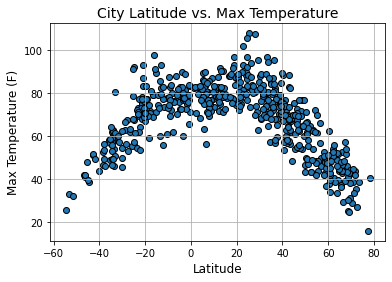

In [55]:
plt.scatter(latitudes, temperatures, marker="o",edgecolors="black")

plt.title("City Latitude vs. Max Temperature", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

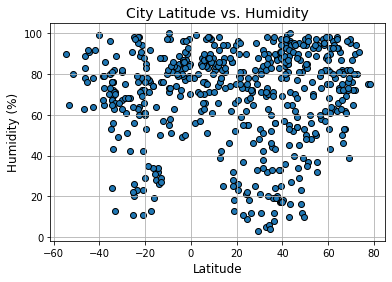

In [54]:
plt.scatter(latitudes, humidity, marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

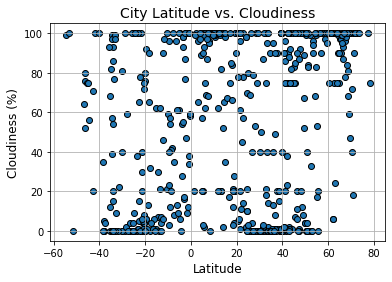

In [52]:
plt.scatter(latitudes, cloudiness, marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

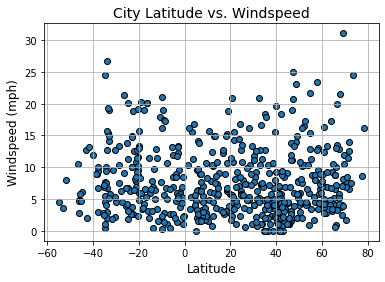

In [51]:
plt.scatter(latitudes, windspeed, marker="o", edgecolors="black")

plt.title("City Latitude vs. Windspeed", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [49]:
# Function for linear regression plots
def lin_reg(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=.5)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='black')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"r-value: {rvalue**2}")
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = city_df[city_df['Lat'] >= 0]
south_hemi_df = city_df[city_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.6354794842009961


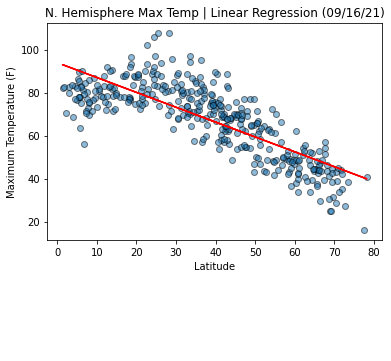

<Figure size 432x288 with 0 Axes>

In [67]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp (F)']
plt.title("N. Hemisphere Max Temp | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (1,-40))
plt.savefig('../Images/North_Temp_Lat_Linear_Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.6037850831635354


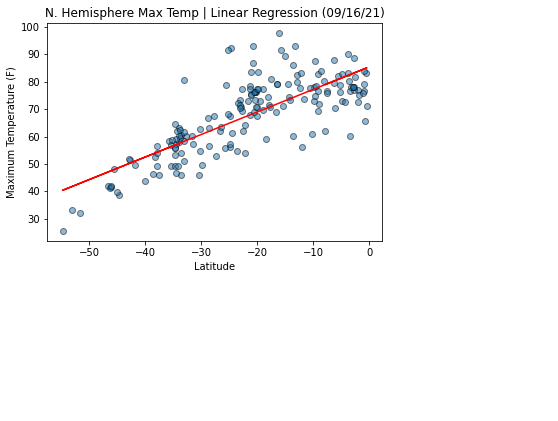

<Figure size 432x288 with 0 Axes>

In [68]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp (F)']
plt.title("N. Hemisphere Max Temp | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (1,-40))
plt.savefig('../Images/South_Temp_Lat_Linear_Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.0030588430026249305


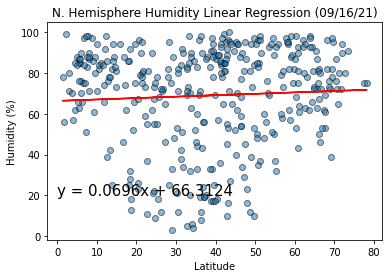

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity (%)']
plt.title("N. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (0,20))
plt.savefig('../Images/N_Humidity_Latitude_Linear_Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.004158210870248961


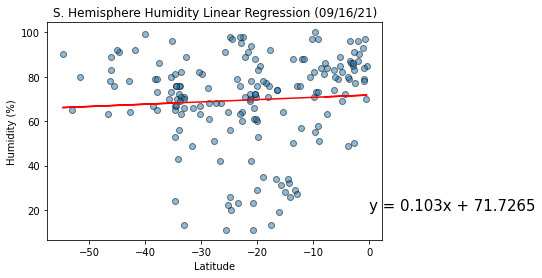

<Figure size 432x288 with 0 Axes>

In [70]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity (%)']
plt.title("S. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (0,20))
plt.savefig('../Images/S_Humidity_Latitude_Linear_Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.02024432088714249


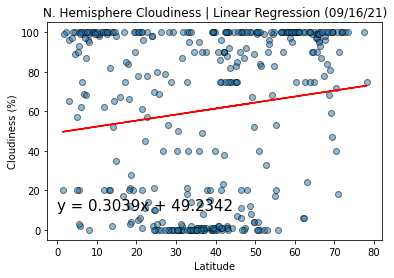

<Figure size 432x288 with 0 Axes>

In [71]:
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Cloudiness (%)']
plt.title("N. Hemisphere Cloudiness | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (0,10))
plt.savefig('../Images/N_Cloud_Latitude_Linear_Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.0011176755681570891


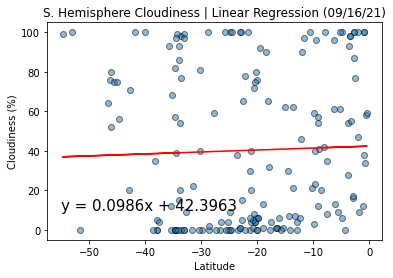

<Figure size 432x288 with 0 Axes>

In [72]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness (%)']
plt.title("S. Hemisphere Cloudiness | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (-55,10))
plt.savefig('../Images/S_Cloud_Latitude_Linear_Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.007836732220951265


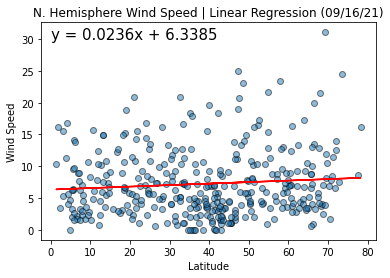

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Wind Speed (mph)']
plt.title("N. Hemisphere Wind Speed | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (0,30))
plt.savefig('../Images/N_Wind_Latitude_Linear_Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.002205977109054716


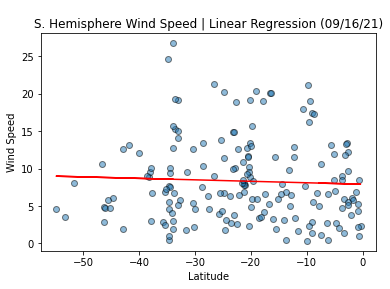

<Figure size 432x288 with 0 Axes>

In [74]:
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed (mph)']
plt.title("S. Hemisphere Wind Speed | Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (-40,30))
plt.savefig('../Images/S_Wind_Latitude_Linear_Regression.png')